In [1]:
import numpy as np
import matplotlib.pylab as plt
import math
import pandas as pd
import seaborn as sns
sns.set()
from matplotlib import rcParams
rcParams['figure.figsize'] = 11.7,8.27

In [420]:
class RLS_2:
    def __init__(self, num_vars, lam, delta):
        '''
        num_vars: Degree of polinomial
        lam: Forgetting factor, usually very close to 1
        delta: Initation value -> ! Bad initation needs more itteration to reach same accuracy
        '''
        self.num_vars = num_vars
        self.P = delta*np.matrix(np.identity(self.num_vars))

        # Weigths/Coefficent of the system
        self.w = np.matrix(np.zeros(self.num_vars))
        self.w = self.w.reshape(self.w.shape[1],1)

        # Kalman Gain Factor
        self.g = np.matrix(np.zeros(num_vars))
        self.g = np.reshape(self.g,(num_vars,1))
        
        # Variables needed for add_obs
        self.lam_inv = lam**(-1)
        
        # A priori error
        self.a_priori_error = 0
        
        # Count of number of observations added
        self.num_obs = 0

    def add_obs(self, x, t):
        '''
        Expected value is t, add the new observation as t.
        t is noisy output of the some linear system. Input of the RLS.

        Task is to identify a system, by determining coefficents,
        that outputs a value which is closest to t.

        x is a column vector as a numpy matrix  |   (new inputs to the system)
        t is a real scalar                      |   (expected output to update weigths)
        '''            

        self.g = self.lam_inv*self.P*x/(1+self.lam_inv*(x.T*self.P*x))
        self.P = self.P*self.lam_inv - self.g*(x.T*self.P)
        self.w = self.w + self.g*(t-x.T*self.w)

        self.a_priori_error = t - x.T*self.w
        self.num_obs += 1
        

    def get_error(self):
        '''
        Finds the (instantaneous) error.
        '''
        return self.a_priori_error

In [421]:
test_size = 1000
# Test function
f = lambda x: 0.07*x**4-1.9*x**3+7.9*x**2-13*x+4
y = np.array([f(i) for i in range(test_size)])

noise = np.random.normal(loc = 0, scale = 2 ,size = test_size)
noisy_y = y + noise

num_vars = 5
lam = 0.98
LS_2 = RLS_2(num_vars,lam,1)

In [422]:
pred_x = []
pred_y = []
pred_e = []

for i in range(500):
    x = np.matrix(np.zeros((1,num_vars)))
    for j in range(num_vars):
        x[0,j] = i**j 
    pred_x.append(i)
    pred_y.append(float(x*LS_2.w))
    LS_2.add_obs(x.T,noisy_y[i])
    pred_e.append(LS_2.get_error())
    
    if(i%50 == 0):
        print("Weigths at trail [{}]:".format(LS_2.num_obs -1), LS_2.w.T)
        #print("Noisy {} , Value_Estimated {}, Difference {}".format(noisy_y[i],pred_y[i-1],np.absolute(noisy_y[i]-pred_y[i-1])))

Weigths at trail [0]: [[3.09771269 0.         0.         0.         0.        ]]
Weigths at trail [50]: [[  2.79130734 -12.42012425   7.8513226   -1.89867492   0.06998857]]
Weigths at trail [100]: [[  4.37155402 -13.10431548   7.90417432  -1.90005576   0.07000024]]
Weigths at trail [150]: [[  4.42404468 -13.08767414   7.90294298  -1.90003299   0.07000012]]
Weigths at trail [200]: [[  4.14429628 -13.01626318   7.90030552  -1.90000265   0.07000001]]
Weigths at trail [250]: [[  3.50213061 -12.96903474   7.89938499  -1.89999599   0.06999999]]
Weigths at trail [300]: [[  3.64542529 -12.98548586   7.89971719  -1.89999819   0.07      ]]
Weigths at trail [350]: [[  6.36928567 -13.09779887   7.9009998   -1.90000373   0.07      ]]
Weigths at trail [400]: [[  0.56614878 -12.93009283   7.89958838  -1.89999913   0.07      ]]
Weigths at trail [450]: [[ -2.42870839 -12.84499998   7.89889379  -1.89999695   0.07      ]]


In [426]:
import pandas_datareader as web
import datetime
start = datetime.date(2016,7,11)
end = datetime.date(2018, 7, 11)
f = web.DataReader('SPY', 'iex', start, end)

ValueError: The IEX Cloud API key must be provided either through the api_key variable or through the  environment variable IEX_API_KEY

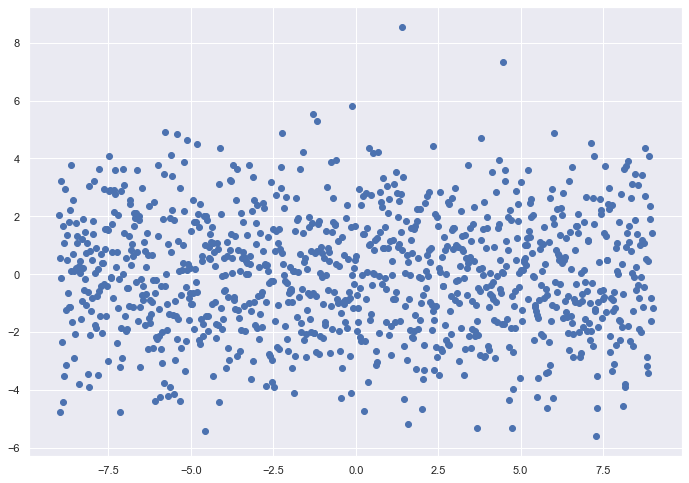

In [243]:
line = plt.linspace(-9,9,1000)
plt.scatter(line,noise)